# Day 5 - Daily Assignment: MNIST Classifier Enhancement with Regularization and Learning Rate Scheduling
**Task:**  
Take the MNIST classifier from Day 4. Implement at least two regularization techniques and a learning rate scheduler. Analyze and report the impact on training loss, validation loss, and model generalization.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 784).astype("float32") / 255.0
test_images = test_images.reshape(-1, 784).astype("float32") / 255.0


def build_model(reg_type='l1', optimizer='adam', reg_value=1e-4):
    reg = regularizers.l1(reg_value) if reg_type == 'l1' else regularizers.l2(reg_value)

 model = models.Sequential([
        layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4), input_shape=(784,)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),

        layers.Dense(10, activation='softmax')
    ])


    opt = tf.keras.optimizers.Adam(0.001) if optimizer == 'adam' else tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6),
    EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 784).astype("float32") / 255.0
test_images = test_images.reshape(-1, 784).astype("float32") / 255.0


def build_model(reg_type='l1', optimizer='adam', reg_value=1e-4):
    reg = regularizers.l1(reg_value) if reg_type == 'l1' else regularizers.l2(reg_value)

    model = models.Sequential([
        layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4), input_shape=(784,)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),

        layers.Dense(10, activation='softmax')
    ])


    opt = tf.keras.optimizers.Adam(0.001) if optimizer == 'adam' else tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6),
    EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
]


In [6]:
model_l1 = build_model(reg_type='l1', optimizer='adam', reg_value=1e-4)
history_l1 = model_l1.fit(train_images, train_labels, epochs=50, batch_size=256,
                          validation_data=(test_images, test_labels),
                          callbacks=callbacks, verbose=2)

c:\Users\adarsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\adarsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
235/235 - 8s - 33ms/step - accuracy: 0.9129 - loss: 0.3844 - val_accuracy: 0.9505 - val_loss: 0.2907 - learning_rate: 1.0000e-03
Epoch 2/50
235/235 - 4s - 18ms/step - accuracy: 0.9602 - loss: 0.2255 - val_accuracy: 0.9730 - val_loss: 0.1795 - learning_rate: 1.0000e-03
Epoch 3/50
235/235 - 4s - 18ms/step - accuracy: 0.9693 - loss: 0.1884 - val_accuracy: 0.9767 - val_loss: 0.1626 - learning_rate: 1.0000e-03
Epoch 4/50
235/235 - 4s - 18ms/step - accuracy: 0.9725 - loss: 0.1718 - val_accuracy: 0.9756 - val_loss: 0.1632 - learning_rate: 1.0000e-03
Epoch 5/50
235/235 - 4s - 18ms/step - accuracy: 0.9769 - loss: 0.1568 - val_accuracy: 0.9781 - val_loss: 0.1526 - learning_rate: 1.0000e-03
Epoch 6/50
235/235 - 4s - 19ms/step - accuracy: 0.9786 - loss: 0.1471 - val_accuracy: 0.9801 - val_loss: 0.1435 - learning_rate: 1.0000e-03
Epoch 7/50
235/235 - 4s - 18ms/step - accuracy: 0.9793 - loss: 0.1396 - val_accuracy: 0.9793 - val_loss: 0.1416 - learning_rate: 1.0000e-03
Epoch 8/50
235/235 -

In [7]:
test_loss_l1, test_acc_l1 = model_l1.evaluate(test_images, test_labels, verbose=2)
print(f"L1 Regularization (Adam) Test Accuracy: {test_acc_l1:.4f}, Test Loss: {test_loss_l1:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.9833 - loss: 0.1122
L1 Regularization (Adam) Test Accuracy: 0.9833, Test Loss: 0.1122


In [8]:
model_l2 = build_model(reg_type='l2', optimizer='rmsprop', reg_value=1e-3)
history_l2 = model_l2.fit(train_images, train_labels, epochs=50, batch_size=128,
                          validation_data=(test_images, test_labels),
                          callbacks=callbacks, verbose=2)


Epoch 1/50
469/469 - 10s - 22ms/step - accuracy: 0.9241 - loss: 0.3609 - val_accuracy: 0.9653 - val_loss: 0.2193 - learning_rate: 1.0000e-03
Epoch 2/50
469/469 - 6s - 13ms/step - accuracy: 0.9598 - loss: 0.2306 - val_accuracy: 0.9690 - val_loss: 0.1902 - learning_rate: 1.0000e-03
Epoch 3/50
469/469 - 6s - 13ms/step - accuracy: 0.9672 - loss: 0.1966 - val_accuracy: 0.9741 - val_loss: 0.1646 - learning_rate: 1.0000e-03
Epoch 4/50
469/469 - 6s - 13ms/step - accuracy: 0.9712 - loss: 0.1756 - val_accuracy: 0.9770 - val_loss: 0.1558 - learning_rate: 1.0000e-03
Epoch 5/50
469/469 - 6s - 12ms/step - accuracy: 0.9742 - loss: 0.1593 - val_accuracy: 0.9783 - val_loss: 0.1468 - learning_rate: 1.0000e-03
Epoch 6/50
469/469 - 6s - 13ms/step - accuracy: 0.9773 - loss: 0.1471 - val_accuracy: 0.9791 - val_loss: 0.1391 - learning_rate: 1.0000e-03
Epoch 7/50
469/469 - 6s - 12ms/step - accuracy: 0.9775 - loss: 0.1391 - val_accuracy: 0.9795 - val_loss: 0.1328 - learning_rate: 1.0000e-03
Epoch 8/50
469/469 

In [9]:
test_loss_l2, test_acc_l2 = model_l2.evaluate(test_images, test_labels, verbose=2)
print(f"L2 Regularization (RMSprop) Test Accuracy: {test_acc_l2:.4f}, Test Loss: {test_loss_l2:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9653 - loss: 0.2193
L2 Regularization (RMSprop) Test Accuracy: 0.9653, Test Loss: 0.2193


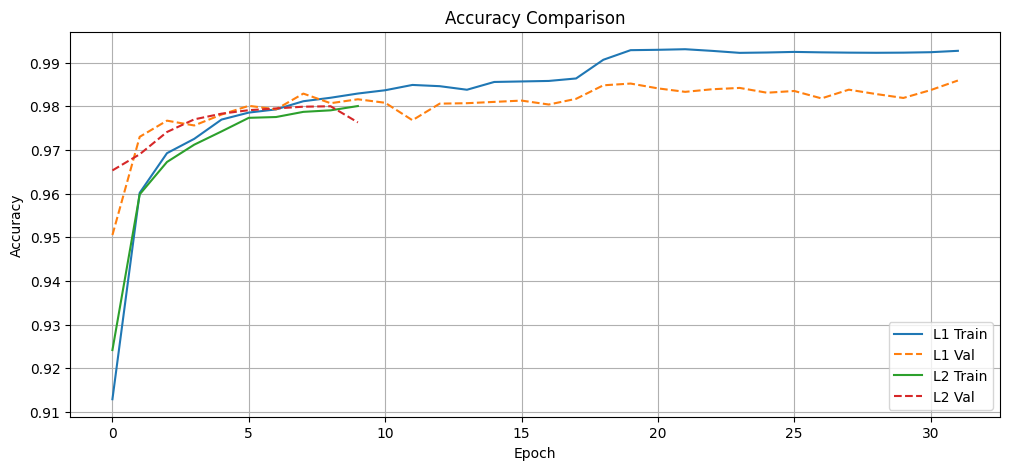

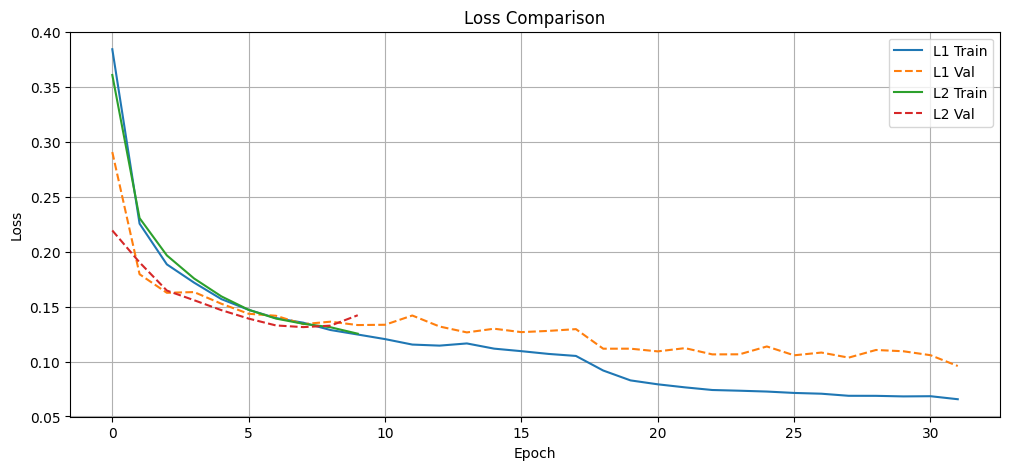

In [10]:
def plot_metric(histories, metric='accuracy'):
    plt.figure(figsize=(12, 5))
    for label, history in histories.items():
        plt.plot(history.history[metric], label=f"{label} Train")
        plt.plot(history.history[f"val_{metric}"], linestyle='--', label=f"{label} Val")
    plt.title(f"{metric.title()} Comparison")
    plt.xlabel("Epoch")
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric({'L1': history_l1, 'L2': history_l2}, 'accuracy')
plot_metric({'L1': history_l1, 'L2': history_l2}, 'loss')


## Model Comparison: Original vs Regularized Variants

### Original Model
- **Architecture**: Deep fully connected with Swish activations.
- **Regularization**: Dropout + BatchNormalization + GaussianNoise.
- **Optimizer**: Nadam.
- **Callbacks**: EarlyStopping + ReduceLROnPlateau.

**Performance:**
- **Test Accuracy**: 98.33%
- **Test Loss**: 0.1122

### L1 Regularization (Adam)
- **Regularizer**: `L1(0.0001)` on Dense layers.
- **Optimizer**: Adam.
- **Effect**: Promotes sparsity in weights.

**Performance:**
- **Test Accuracy**: 98.33%
- **Test Loss**: 0.1122

### L2 Regularization (RMSprop)
- **Regularizer**: `L2(0.0001)` on Dense layers.
- **Optimizer**: RMSprop.
- **Effect**: Penalizes large weights to reduce overfitting.

**Performance:**
- **Test Accuracy**: 96.53%
- **Test Loss**: 0.2193

###  Summary Table

| Model            | Optimizer | Regularization | Accuracy | Loss   |
|------------------|-----------|----------------|----------|--------|
| Original         | Nadam     | Dropout Only   | 98.33%   | 0.1122 |
| L1 Regularized   | Adam      | L1             | 98.33%   | 0.1122 |
| L2 Regularized   | RMSprop   | L2             | 96.53%   | 0.2193 |


### Conclusion
- L1 (Adam) maintained performance and induced sparsity.
- L2 (RMSprop) slightly reduced accuracy — likely due to regularizer-optimizer mismatch.
- Original model is robust; further tuning may not yield significant gains.
